In [13]:
import sys
sys.path.append('..')
sys.path.append('../stylegan3')

from stylegan_generator import StyleGANGenerator

import pickle
import h5py

import numpy as np
import matplotlib.pyplot as plt

In [7]:
_attributes = ['Eyeglasses']
_noise_path_no_feature = '/home/robert/data/diploma-thesis/datasets/features/z/eyeglasses/0.h5'
_noise_path_feature = '/home/robert/data/diploma-thesis/datasets/features/z/eyeglasses/1/1_5.h5'
_predictions_path = '/home/robert/data/diploma-thesis/datasets/features/predictions/resnet34_10attr.pkl'

network_pkl = 'https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl'
# network_pkl = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl'
generator = StyleGANGenerator(network_pkl)

In [19]:
with open(_predictions_path, 'rb') as f:
    predictions = pickle.load(f)[:,1]
    
with h5py.File(_noise_path_feature, 'r') as f:
    z = f['z'][:]
    
with h5py.File(_noise_path_no_feature, 'r') as f:
    z_no_feature = f['z'][:]
    
print(predictions.shape, z.shape, z_no_feature.shape)

(234220,) (234220, 512) (234220, 512)


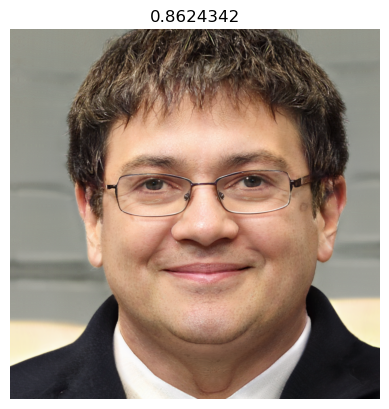

In [16]:
image_n = 0
img = generator.generate_from(np.reshape(z[image_n], (1,512)), truncation_psi=0.7)
plt.title(predictions[image_n])
plt.axis('off')
plt.imshow(img[0]/255)

In [17]:
eyeglasses_idx = np.where(predictions > 0.5)[0]
eyeglasses_z = z[eyeglasses_idx]
eyeglasses_predictions = predictions[eyeglasses_idx]

In [22]:
no_eyeglasses_z = z_no_feature[eyeglasses_idx]
no_eyeglasses_z.shape, eyeglasses_z.shape

((92995, 512), (92995, 512))

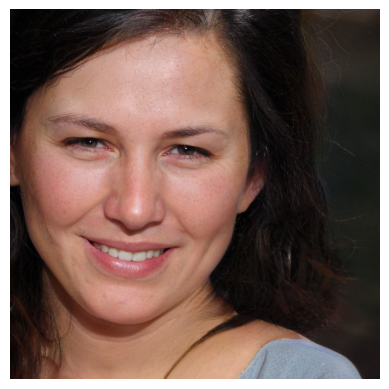

In [33]:
image_n = 12
img = generator.generate_from(np.reshape(no_eyeglasses_z[image_n], (1,512)), truncation_psi=0.7)
plt.axis('off')
plt.imshow(img[0]/255)

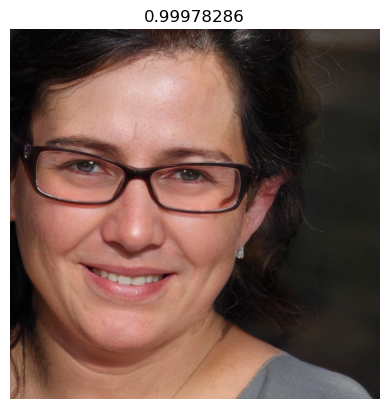

In [34]:
img = generator.generate_from(np.reshape(eyeglasses_z[image_n], (1,512)), truncation_psi=0.7)
plt.title(predictions[image_n])
plt.axis('off')
plt.imshow(img[0]/255)

In [36]:
idx = np.random.randint(92995, size=10)
imgs1 = generator.generate_from(no_eyeglasses_z[idx], truncation_psi=0.7)
imgs2 = generator.generate_from(eyeglasses_z[idx], truncation_psi=0.7)

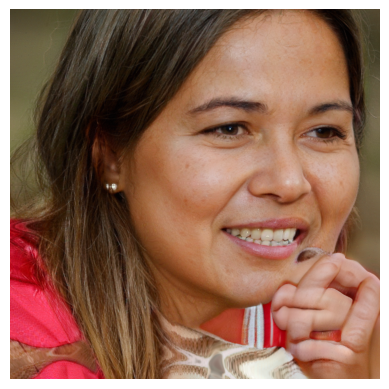

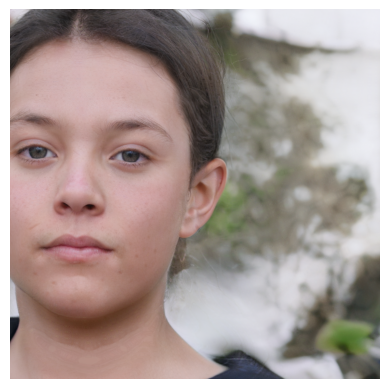

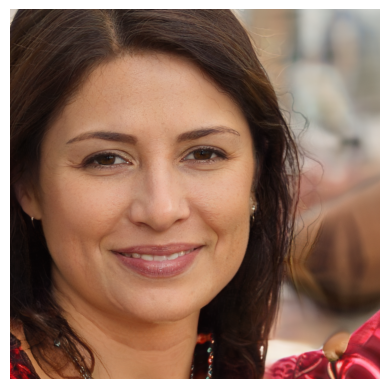

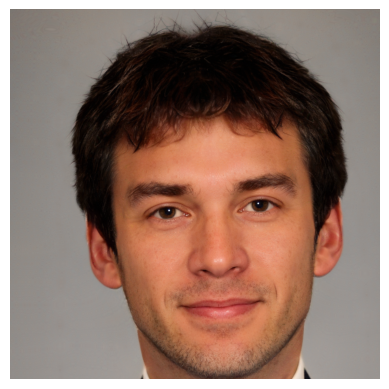

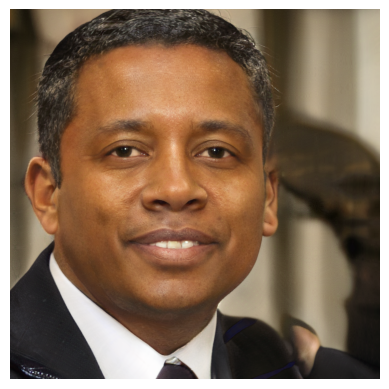

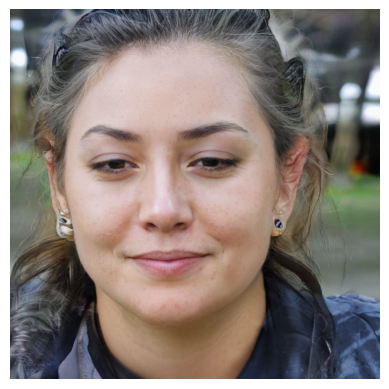

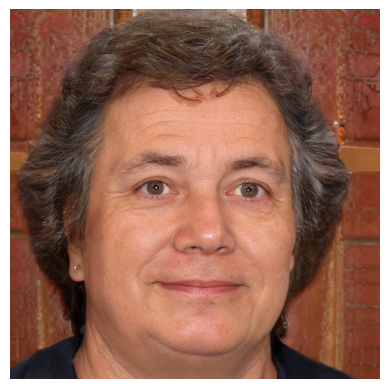

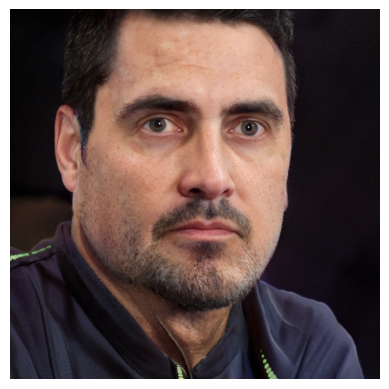

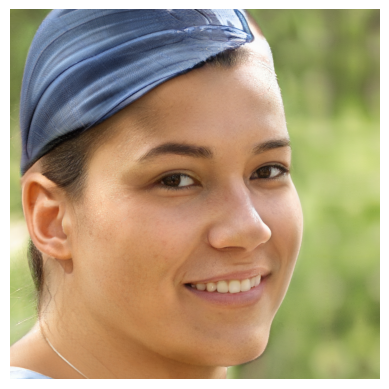

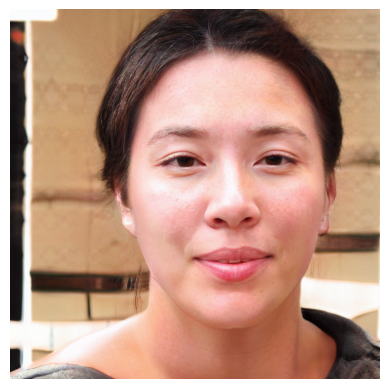

In [37]:
for img in imgs1:
    plt.axis("off")
    plt.imshow(img/255)
    plt.show()

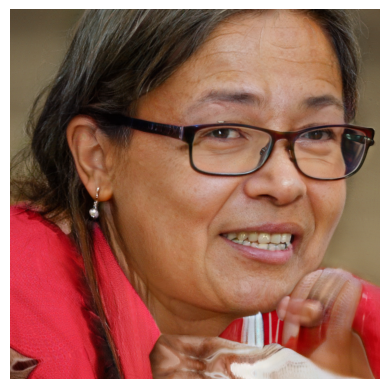

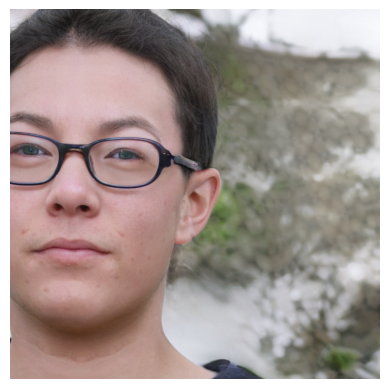

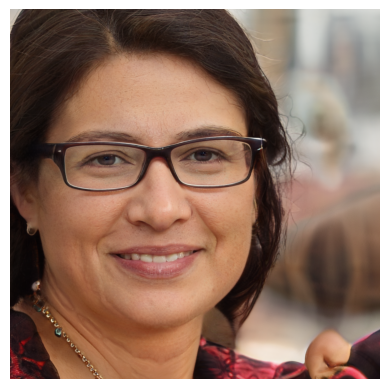

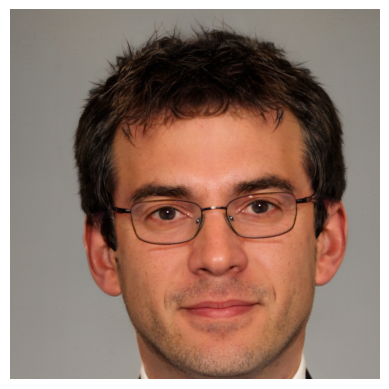

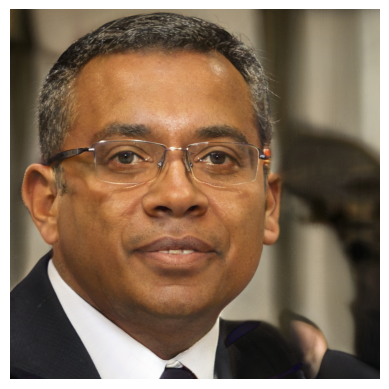

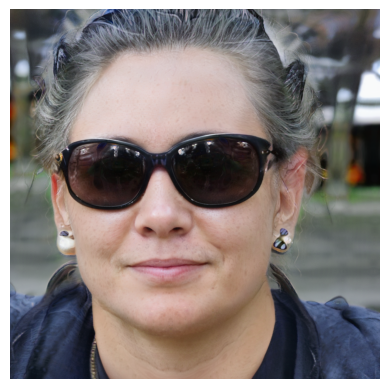

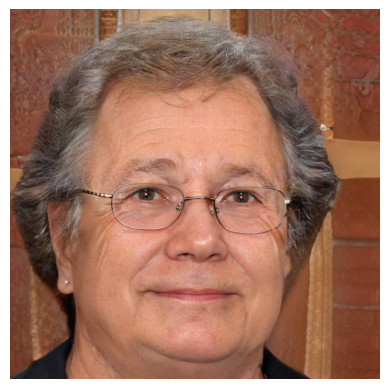

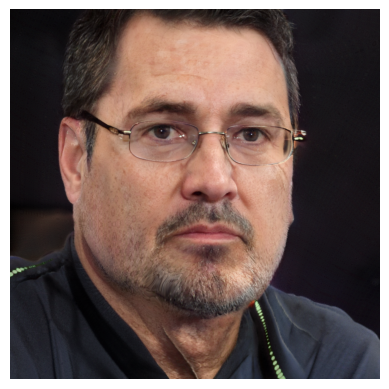

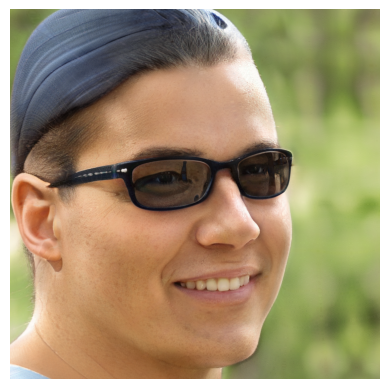

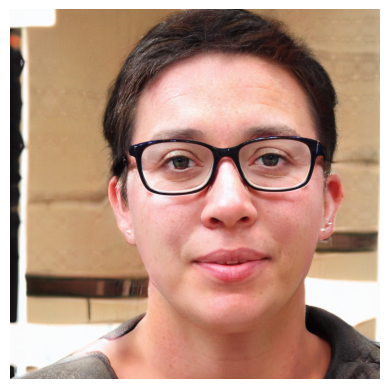

In [38]:
for img in imgs2:
    plt.axis("off")
    plt.imshow(img/255)
    plt.show()

In [39]:
no_eyeglasses_z.shape, eyeglasses_z.shape

((92995, 512), (92995, 512))

In [89]:
dataset = np.array([[]])
for i in range(len(_attributes)):
    true_labels = np.zeros((len(eyeglasses_z), len(_attributes)))
    true_labels[:,i] = 1
    false_labels = np.zeros((len(no_eyeglasses_z), len(_attributes)))
    
    dataset = np.hstack((dataset, np.array(list(zip(no_eyeglasses_z, true_labels, eyeglasses_z)), dtype=object)))
    dataset = np.hstack((dataset, np.array(list(zip(no_eyeglasses_z, false_labels, no_eyeglasses_z)), dtype=object)))
    dataset = np.hstack((dataset, np.array(list(zip(eyeglasses_z, true_labels, eyeglasses_z)), dtype=object)))
    dataset = np.hstack((dataset, np.array(list(zip(eyeglasses_z, false_labels, no_eyeglasses_z)), dtype=object)))

In [59]:
len(dataset)

371980

In [68]:
with open('/home/robert/data/diploma-thesis/datasets/features/eyeglasses_dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [70]:
with open('/home/robert/data/diploma-thesis/datasets/features/eyeglasses_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [83]:
idx = np.random.randint(92995, size=10)
imgs1 = generator.generate_from(data[idx][0], truncation_psi=0.7)
imgs2 = generator.generate_from(data[idx][0], truncation_psi=0.7)
imgs3 = generator.generate_from(data[idx][0], truncation_psi=0.7)
imgs4 = generator.generate_from(data[idx][0], truncation_psi=0.7)

TypeError: only integer scalar arrays can be converted to a scalar index